In [3]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

package_dir = '../src'
package_dir = os.path.dirname(package_dir)
if package_dir not in sys.path:
    sys.path.append(package_dir)

from src.sentinel2_handling.sentinel2_downloader import query_sentinel2, filter_item_list
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# Intro: 
Punggol has changed dramatically over the years.. Using Sentinel2 data, I would like to visualize and explore the changes.

# Data Loading from Sentinel2

In [1]:
ns_bounds = [1.436854329,1.369035479] #lat
ew_bounds = [103.950174586,103.846584666] #long
bbox = [ew_bounds[1],ns_bounds[1],ew_bounds[0],ns_bounds[0]]

In [17]:
items = query_sentinel2(bbox=bbox, max_cloud_cover=85, num_days_before_end=1500)

In [18]:
filt_metadata, filt_item_procs = filter_item_list(items, bbox=bbox, min_usable_pct=80)

List filtered as 21 out of 184 items orginally


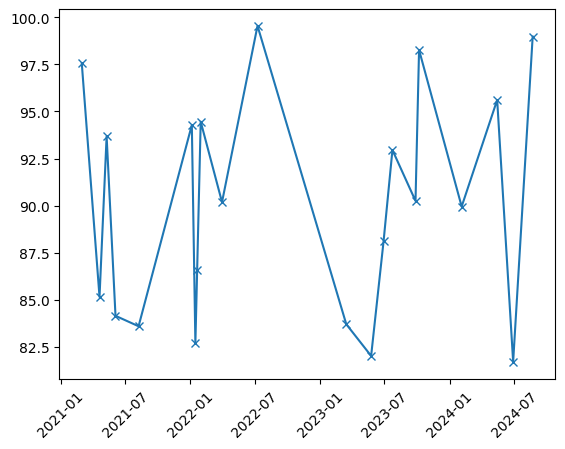

In [20]:
plt.figure()
x = [] 
y = []
for m in filt_metadata:
    x.append(dt.strptime(m[0], "%Y-%m-%d"))
    y.append(m[-1])
plt.plot(x,y,'-x')
plt.xticks(rotation=45);

In [22]:
num_days_between_shots = []
date_format = "%Y-%m-%d"
for n in range(1,len(filt_metadata)):
    start_date = dt.strptime(filt_metadata[n-1][0],"%Y-%m-%d")
    end_date = dt.strptime(filt_metadata[n][0],"%Y-%m-%d")
    num_days_between_shots.append((end_date-start_date).days + 1)

print(num_days_between_shots)

[51, 21, 26, 66, 151, 11, 6, 11, 61, 101, 251, 71, 36, 26, 66, 11, 121, 101, 46, 56]


In [23]:
filt_metadata

[('2021-03-01', 39.978518, 97.56489914819868),
 ('2021-04-20', 14.743568, 85.14971053504922),
 ('2021-05-10', 13.136637, 93.68247354253475),
 ('2021-06-04', 64.650452, 84.1439581105498),
 ('2021-08-08', 48.148502, 83.58945757586932),
 ('2022-01-05', 30.571723, 94.28030163354106),
 ('2022-01-15', 17.352597, 82.69525056233637),
 ('2022-01-20', 49.085636, 86.5864338655555),
 ('2022-01-30', 41.239601, 94.45776024189682),
 ('2022-03-31', 63.752383, 90.18262104059885),
 ('2022-07-09', 53.789723, 99.54920904163133),
 ('2023-03-16', 8.515546, 83.6973155352336),
 ('2023-05-25', 48.501119, 82.01399387883033),
 ('2023-06-29', 53.193116, 88.09552343375493),
 ('2023-07-24', 21.609002, 92.95189719384933),
 ('2023-09-27', 10.667416, 90.24853423798814),
 ('2023-10-07', 20.181283, 98.26966333566872),
 ('2024-02-04', 62.003756, 89.94892879530956),
 ('2024-05-14', 20.551923, 95.61239352483499),
 ('2024-06-28', 28.924945, 81.69917769829271),
 ('2024-08-22', 16.529408, 98.97811497474096)]

ok. lets drop the shots on 2022-01-15 and 2022-01-20, indexes 6 and 7

In [29]:
filt_metadata.pop(6)

('2022-01-15', 17.352597, 82.69525056233637)

In [31]:
filt_metadata.pop(6) #redo 6, because the original 6 has been removed =)

('2022-01-30', 41.239601, 94.45776024189682)

In [32]:
filt_item_procs.pop(6)

In [33]:
filt_item_procs.pop(6)

In [34]:
#compute indices:
[ip.load_and_compute_spectral_indices() for ip in filt_item_procs];

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# RGB composite timelapse